# Most important features that influence housing prices

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

## Reading data into a DataFrame

In [2]:
df_train = pd.read_csv('Data/train.csv')

## Looking at the data and cleaning it

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print(f'Number of rows: {df_train.shape[0]}')

Number of rows: 1460


In [137]:
print(f'Number of columns: {df_train.shape[1]}')

Number of columns: 81


In [138]:
 
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [139]:
df_train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [140]:
df_train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [141]:
df_train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [142]:
df_train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [143]:
df_train = df_train.drop(columns=['PoolQC', 'MiscFeature', 'Fence'])

In [144]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [145]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Looking for the columns with a corrolation higher then 0.6

In [176]:
top_corr = df_train.corr()['SalePrice'][1:-1].abs().apply(lambda x: (x if x > 0.6 else pd.NA)).dropna()
top_corr

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice             1
Name: SalePrice, dtype: object

## Building a model with all the columns with a higher corrolation then 0.6

In [9]:
df_train = sm.add_constant(df_train)
df_train_y = df_train["SalePrice"]
df_train_x = df_train[['const','TotalBsmtSF', '1stFlrSF','GarageArea', 'GrLivArea', 'OverallQual', 'GarageCars']]
train_lr = sm.OLS(df_train_y, df_train_x).fit()

In [10]:
train_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     775.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:59:14   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1453   BIC:                         3.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.027e+05   4903.994    -20.932      0.000   -1.12e+05    -9.3e+04
TotalBsmtSF    24.3908      4.318      5.649      0.000      15.921      32.860
1stFlrSF       11.1859      5.032      2.223      0.026       1.315      21.057
GarageArea     15.6639     10.475      1.495      0.135      -4.884      36.212
GrLivArea      43.1229      2.679     16.095      0.000      37.867      48.379
OverallQual    2.4e+04   1083.393     22.150      0.000    2.19e+04    2.61e+04
GarageCars   1.452e+04   3018.621      4.809      0.000    8593.872    2.04e+04
==============================================================================
Omnibus:                      431.781   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39208.253
Skew:                          -0.313   Prob(JB):                         0.00
Kurtosis:                      28.380   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, when we build an OLS model using all of the columns that have a correlation of more then 0.6 with the sales price, the R squared is very strong with 0.762. This was expected because we are taking the 6 colunms with the "strogest" influence on the sales price. All our P-values are smaller then 5% meaning the columns are statistically relevant.

### Taking only the columns with the same unit

I took only the columns with the unit of square feet, to be able to compare the importance between each other. I replaced the "GrLivArea" column with "2ndFlrSF". I doesn't make sense to keep the "2ndFlrSF" column in our model since it is the sum of: "1stFlrSF" and "2ndFlrSF". 

In [16]:
df_train = sm.add_constant(df_train)
df_train_y = df_train["SalePrice"]
df_train_x = df_train[['const','TotalBsmtSF', '1stFlrSF','GarageArea', '2ndFlrSF']]
train_lr = sm.OLS(df_train_y, df_train_x).fit()

In [17]:
train_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     725.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:18:58   Log-Likelihood:                -17744.
No. Observations:                1460   AIC:                         3.550e+04
Df Residuals:                    1455   BIC:                         3.552e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.276e+04   4229.525     -5.380      0.000   -3.11e+04   -1.45e+04
TotalBsmtSF    53.5713      4.870     10.999      0.000      44.018      63.125
1stFlrSF       63.7131      5.599     11.379      0.000      52.730      74.696
GarageArea    101.3675      6.838     14.824      0.000      87.954     114.781
2ndFlrSF       72.0755      2.938     24.529      0.000      66.312      77.839
==============================================================================
Omnibus:                      778.563   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73351.494
Skew:                          -1.557   Prob(JB):                         0.00
Kurtosis:                      37.584   Cond. No.                     6.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, when we build an OLS model using all of the columns with square feet as an unit, the R squared is still strong with 0.666. This shows that when people buy a house they value a lot how much square feet are where. All our P-values are smaller then 5% meaning the columns are statistically relevant. As I would not have expected the garage square feet is the most valuable, with a 101 Dollar increase per sqaure feet more.

### Taking the column with the highest corrolation


In [23]:
df_train = sm.add_constant(df_train)
df_train_y = df_train["SalePrice"]
df_train_x = df_train[['const','OverallQual']]
train_lr = sm.OLS(df_train_y, df_train_x).fit()

In [24]:
train_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          2.19e-313
Time:                        16:21:06   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see, when we build an OLS model using only the column with the highest corrolation, the R squared is still strong with 0.626. This shows that when people buy a house the quality plays one of the biggest roles when it comes to pricing. Ourur P-values is still smaller then 5% meaning the columns are statistically relevant.

## Looking at the square feet price

In [163]:
df_train['LotSFprice'] = df_train['SalePrice']/df_train['LotArea']

In [167]:
df_train['LivingSFprice'] = df_train['SalePrice']/df_train['GrLivArea']

In [168]:
df_train.groupby('YrSold').mean()

,const,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,LotSFprice,LivingSFprice
YrSold,,,,,,,,,,,,,,,,,,,,,
2006,1.0,740.191083,59.888535,69.305660,10489.458599,6.130573,5.420382,1972.117834,1982.585987,93.869010,...,50.394904,22.726115,2.519108,12.799363,7.697452,16.305732,6.487261,182549.458599,20.995990,119.854862
2007,1.0,710.753799,54.316109,71.349624,10863.686930,6.133739,5.583587,1972.279635,1986.018237,117.428135,...,48.996960,23.826748,1.580547,15.182371,1.686930,93.708207,6.610942,186063.151976,20.897176,121.609500
2008,1.0,730.213816,59.029605,69.397638,10587.687500,6.111842,5.759868,1968.907895,1984.796053,107.156146,...,48.641447,21.154605,5.937500,17.108553,3.473684,23.059211,6.546053,177360.838816,20.907444,121.347008
2009,1.0,750.943787,54.674556,69.296703,10294.248521,6.076923,5.514793,1971.757396,1985.866864,102.445104,...,44.281065,18.529586,4.378698,16.008876,0.000000,20.650888,6.718935,179432.103550,21.703296,119.473571
2010,1.0,711.245714,56.971429,71.608392,10220.645714,6.000000,5.634286,1970.994286,1984.977143,91.913793,...,36.720000,25.051429,2.182857,13.502857,0.000000,77.451429,4.325714,177393.674286,20.585909,120.690814


## Looking at the neighborhoods to see if their is a corrolation with the price

In [25]:
df_neigh = df_train.groupby('Neighborhood')['SalePrice'].agg(['mean', 'std']).astype('int64').sort_values(by = 'mean', ascending=False)

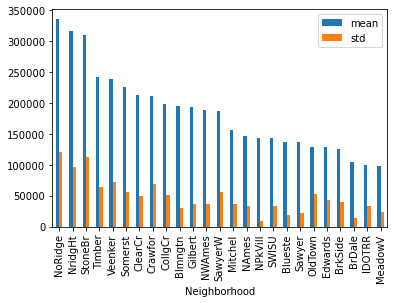

In [26]:
df_neigh.plot.bar()